# Lab 1 - Attributes and Visualization

Team: Frank Sclafni, Jan Shook, and Leticia Valadez

# Business Understanding

## Rubric (10 pts)

This initial phase focuses on understanding the project objective and requirement from a business perspective, and then converting this knowledge into a data mining problem definition, and a preliminary plan designed to achieve the objectives. A decision model, especially one built using the Decision Model and Notation standard can be used.

> Describe the purpose of the data set you selected (i.e., why was this data collected in the ﬁrst place?). Describe how you would deﬁne and measure the outcomes from the dataset. That is, why is this data important and how do you know if you have mined useful knowledge from the dataset? How would you measure the effectiveness of a good prediction algorithm? Be speciﬁc. 

## TV News Channel Commercial Detection

Our team selected this dataset for two reasons: 1) It has a large number of instances (129,685, which is greater than the requirement of at least 30,000) and enough attributes (14, which is greater than the requirement of at least 10), and 2) It looks like an interesting dataset (detecting commercials). Initial questions of interest are how do you detect commercials from this data? Can a model be trained to detect and skip (or remove) commercials? If so, would this solution be robust enough for commercial products like TiVo?

This dataset is from the UCI Machine Learning website (https://archive.ics.uci.edu/ml/datasets/TV+News+Channel+Commercial+Detection+Dataset). It consists of popular audio-visual features of video shots extracted from 150 hours of TV news broadcast of 3 Indian and 2 international news channels (30 Hours each). In the readme accompanying the data, the authors describe the potential benefits of this data as follows:

> Automatic identification of commercial blocks in news videos finds a lot of applications in the domain of television broadcast analysis and monitoring. Commercials occupy almost 40-60% of total air time. Manual segmentation of commercials from thousands of TV news channels is time consuming, and economically infeasible hence prompts the need for machine learning based Method. Classifying TV News commercials is a semantic video classification problem. TV News commercials on particular news channel are combinations of video shots uniquely characterized by audio-visual presentation. Hence various audio visual features extracted from video shots are widely used for TV commercial classification. Indian News channels do not follow any particular news presentation format, have large variability and dynamic nature presenting a challenging machine learning problem. Features from 150 Hours of broadcast news videos from 5 different (3 Indian and 2 International News channels) news channels. Viz. CNNIBN, NDTV 24X7, TIMESNOW, BBC and CNN are presented in this dataset. Videos are recorded at resolution of 720 X 576 at 25 fps using a DVR and set top box. 3 Indian channels are recorded concurrently while 2 International are recorded together. Feature file preserves the order of occurrence of shots.

Given this information, is the subset of Indian datasets really different from the international datasets? If so, can commercials still be identified from both Indian and international datasets the same way?


## About this Notebook

This Jupyter (v4.3.0) notebook was developed on Windows 10 Pro (64 bit) using Anaconda v4.4.7 and Python v3.*.

Packages associated with Anaconda were extracted as follows:

> conda install -c anaconda pandas

> conda install -c anaconda numpy 

In addition to the packages in Anaconda (and outside of the Anaconda ecosystem), this notebook uses Plotly (v2.2.3) for visualization. The zip file for Plotly can be found on GitHub at (https://github.com/plotly/plotly.py). You can install the Plotly packages as follows:

> pip install plotly

> pip install cufflinks

The version of Pandas and its dependencies are shown below.

In [8]:
import pandas as pd
import numpy as np

%time pd.show_versions()


INSTALLED VERSIONS
------------------
commit: None
python: 3.6.3.final.0
python-bits: 64
OS: Windows
OS-release: 10
machine: AMD64
processor: Intel64 Family 6 Model 60 Stepping 3, GenuineIntel
byteorder: little
LC_ALL: None
LANG: None
LOCALE: None.None

pandas: 0.22.0
pytest: 3.2.1
pip: 9.0.1
setuptools: 36.5.0.post20170921
Cython: 0.26.1
numpy: 1.13.3
scipy: 0.19.1
pyarrow: None
xarray: None
IPython: 6.1.0
sphinx: 1.6.3
patsy: 0.4.1
dateutil: 2.6.1
pytz: 2017.2
blosc: None
bottleneck: 1.2.1
tables: 3.4.2
numexpr: 2.6.2
feather: None
matplotlib: 2.1.0
openpyxl: 2.4.8
xlrd: 1.1.0
xlwt: 1.3.0
xlsxwriter: 1.0.2
lxml: 4.1.0
bs4: 4.6.0
html5lib: 0.999999999
sqlalchemy: 1.1.13
pymysql: None
psycopg2: None
jinja2: 2.9.6
s3fs: None
fastparquet: None
pandas_gbq: None
pandas_datareader: None
Wall time: 15 ms


# Data Understanding

## Rubric (80 pts)

The data understanding phase starts with an initial data collection and proceeds with activities in order to get familiar with the data, to identify data quality problems, to discover first insights into the data, or to detect interesting subsets to form hypotheses for hidden information.

> [10 points] Describe the meaning and type of data (scale, values, etc.) for each attribute in the data ﬁle.

> [15 points] Verify data quality: Explain any missing values, duplicate data, and outliers. Are those mistakes? How do you deal with these problems? Give justiﬁcations for your methods.

> [10 points] Visualize appropriate statistics (e.g., range, mode, mean, median, variance, counts) for a subset of attributes. Describe anything meaningful you found from this or if you found something potentially interesting. Note: You can also use data from other sources for comparison. Explain why the statistics run are meaningful.

> [15 points] Visualize the most interesting attributes (at least 5 attributes, your opinion on what is interesting). Important: Interpret the implications for each visualization. Explain for each attribute why the chosen visualization is appropriate.  
Page ! of ! 17 39
 
> [15 points] Visualize relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain any interesting relationships.

> [10 points] Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classiﬁcation).

> [5 points] Are there other features that could be added to the data or created from existing features?  Which ones?

## Exceptional Work Rubric (10 pts)

> [10 points total] You have free reign to provide additional analyses. One idea: implement dimensionality reduction, then visualize and interpret the results.


## About this Dataset (Summary)

This project is comprised of five datasets (bbc.txt, cnn.txt, cnnibn.txt, ndtv.txt, and timesnow.txt), all found at the UCI Machine Learning webset at https://archive.ics.uci.edu/ml/datasets/TV+News+Channel+Commercial+Detection+Dataset. Combined, these five datasets have 129,685 instances (rows) and 14 attributes. As shown in the example record below, most of these attributes have multiple data points (often hundreds) and almost all of these values are floating point.

> 1  1:123 2:1.316440 3:1.516003 4:5.605905 5:5.346760 6:0.013233 7:0.010729 8:0.091743 9:0.050768 10:3808.067871 11:702.992493 12:7533.133301 13:1390.499268 14:971.098511 15:1894.978027 16:114.965019 17:45.018257 18:0.635224 19:0.095226 20:0.063398 21:0.061210 22:0.038319 23:0.018285 24:0.011113 25:0.007736 26:0.004864 27:0.004220 28:0.003273 29:0.002699 30:0.002553 31:0.002323 32:0.002108 33:0.002036 34:0.001792 35:0.001553 36:0.001250 37:0.001317 38:0.001084 39:0.000818 40:0.000624 41:0.000586 42:0.000529 43:0.000426 44:0.000359 45:0.000446 46:0.000268 47:0.000221 48:0.000154 49:0.000217 50:0.000193 51:0.000163 52:0.000165 53:0.000210 54:0.000114 55:0.000130 56:0.000055 57:0.000013 58:0.733037 59:0.133122 60:0.041263 61:0.019699 62:0.010962 63:0.006927 64:0.004525 65:0.003128 66:0.002314 67:0.001762 68:0.001361 69:0.001065 70:0.000914 71:0.000777 72:0.000667 73:0.000565 74:0.000520 75:0.000467 76:0.000469 77:0.000486 78:0.000417 79:0.000427 80:0.000349 81:0.000258 82:0.000262 83:0.000344 84:0.000168 85:0.000163 86:0.001058 90:0.020584 91:0.185038 92:0.148316 93:0.047098 94:0.169797 95:0.061318 96:0.002200 97:0.010440 98:0.004463 100:0.010558 101:0.002067 102:0.338970 103:0.470364 104:0.189997 105:0.018296 106:0.126517 107:0.047620 108:0.045863 109:0.184865 110:0.095976 111:0.015295 112:0.056323 113:0.024587 115:0.037647 116:0.006015 117:0.160327 118:0.251688 119:0.176144 123:0.006356 219:0.002119 276:0.002119 296:0.341102 448:0.099576 491:0.069915 572:0.141949 573:0.103814 601:0.002119 623:0.050847 726:0.038136 762:0.036017 816:0.036017 871:0.016949 924:0.008475 959:0.036017 1002:0.006356 1016:0.008475 1048:0.002119 4124:0.422333825949 4125:0.663917631952

All five datasets are formated in the svmlight / libsvm format. This format is a text-based format, with one sample per line. It is a light format meaning it does not store zero valued features, every fetature that is "missing" has a value of zero. The first element of each line is used to store a target variable, and in this case it is the vaue of the atriburtes below. 

Hence, the file simply contains more records like the one shown above. While there are only 14 attributes in each dataset, most attributes can have more than one column of data. 

## Description of Attributes

The following sections describe this dataset using the Readme.txt file, examination of the data, and definition of the terms.

In [10]:
# We are using a Pandas dataframe to tabulate the data (and provide an simple introduction into Pandas)

#Dimension Index  ... first column

df_attributes = pd.DataFrame(
  data=[
    ('Dimension Index','0','integer',''),
    ('Shot Length','1','integer',''),
    ('Motion Distribution','2-3','float','Mean and Variance'),
    ('Frame Difference Distribution','4-5','float','Mean and Variance'),
    ('Short time energy','6-7','float','Mean and Variance'),
    ('ZCR','8-9','float','Mean and Variance'),
    ('Spectral Centroid','10-11','float','Mean and Variance'),
    ('Spectral Roll off','12-13','float','Mean and Variance'),
    ('Spectral Flux','14-15','float','Mean and Variance'),
    ('Fundamental Frequency','16-17','float','Mean and Variance'),
    ('Motion Distribution','18-58','float','40 bins'),
    ('Frame Difference Distribution','59-91','float','32 bins'),
    ('Text area distribution','92-122','float','15 bins Mean and 15 bins for variance'),
    ('Bag of Audio Words','123-4123','float','4,000 bins'), 
    ('Edge change Ratio','4124-4125','float','Mean and Variance')
  ],
  columns=[
    'Attribute Name','Columns','Datatype','Notes'
  ],
  index=[
    'Attribute 00', 'Attribute 01', 'Attribute 02', 'Attribute 03', 'Attribute 04', 'Attribute 05', 'Attribute 06',
    'Attribute 07', 'Attribute 08', 'Attribute 09', 'Attribute 10', 'Attribute 11', 'Attribute 12', 'Attribute 13',
    'Attribute 14'
  ]
)

# we will later omit the Bag of Audio Words attribute,"123-4123" to reduce the sparcity of the data.
# tabulate is used to left justify these string value columns (versus the right-justified default)

#from tabulate import tabulate

#print(tabulate(df_attributes, showindex=True, headers=df_attributes.columns))

In [ ]:
#print(df_temp1[0].column)

#pd.set_option('display.max_row', 1000)
#pd.set_option('display.max_columns', 150)

df_attributes.rename(columns={0: 'Dimension Index'}, inplace=True)
df_attributes.rename(columns={1: 'Shot'}, inplace=True)
df_attributes.rename(columns={2: 'Motion Distribution-Mean'}, inplace=True)
df_attributes.rename(columns={3: 'Motion Distribution-Variance'}, inplace=True)
df_attributes.rename(columns={4: 'Frame Difference Distribution-Mean'}, inplace=True)
df_attributes.rename(columns={5: 'Frame Difference Distribution-Variance'}, inplace=True)
df_attributes.rename(columns={6: 'Short time energy-Mean'}, inplace=True)
df_attributes.rename(columns={7: 'Short time energy-Variance'}, inplace=True)
df_attributes.rename(columns={8: 'ZCR-Mean'}, inplace=True)
df_attributes.rename(columns={9: 'ZCR-Variance'}, inplace=True)
df_attributes.rename(columns={10: 'Spectral Centroid-Mean'}, inplace=True)
df_attributes.rename(columns={11: 'Spectral Centroid-Variance'}, inplace=True)
df_attributes.rename(columns={12: 'Spectral Roll off-Mean'}, inplace=True)
df_attributes.rename(columns={13: 'Spectral Roll off-Variance'}, inplace=True)
df_attributes.rename(columns={14: 'Spectral Flux-Mean'}, inplace=True)
df_attributes.rename(columns={15: 'Spectral Flux-Variance'}, inplace=True)
df_attributes.rename(columns={16: 'Fundamental Frequency-Mean'}, inplace=True)
df_attributes.rename(columns={17: 'Fundamental Frequency-Variance'}, inplace=True)
df_attributes.rename(columns={18: 'Motion Distribution-Bin 1'}, inplace=True)
df_attributes.rename(columns={19: 'Motion Distribution-Bin 2'}, inplace=True)
df_attributes.rename(columns={20: 'Motion Distribution-Bin 3'}, inplace=True)
df_attributes.rename(columns={21: 'Motion Distribution-Bin 4'}, inplace=True)
df_attributes.rename(columns={22: 'Motion Distribution-Bin 5'}, inplace=True)
df_attributes.rename(columns={23: 'Motion Distribution-Bin 6'}, inplace=True)
df_attributes.rename(columns={24: 'Motion Distribution-Bin 7'}, inplace=True)
df_attributes.rename(columns={25: 'Motion Distribution-Bin 8'}, inplace=True)
df_attributes.rename(columns={26: 'Motion Distribution-Bin 9'}, inplace=True)
df_attributes.rename(columns={27: 'Motion Distribution-Bin 10'}, inplace=True)
df_attributes.rename(columns={28: 'Motion Distribution-Bin 11'}, inplace=True)
df_attributes.rename(columns={29: 'Motion Distribution-Bin 12'}, inplace=True)
df_attributes.rename(columns={30: 'Motion Distribution-Bin 13'}, inplace=True)
df_attributes.rename(columns={31: 'Motion Distribution-Bin 14'}, inplace=True)
df_attributes.rename(columns={32: 'Motion Distribution-Bin 15'}, inplace=True)
df_attributes.rename(columns={33: 'Motion Distribution-Bin 16'}, inplace=True)
df_attributes.rename(columns={34: 'Motion Distribution-Bin 17'}, inplace=True)
df_attributes.rename(columns={35: 'Motion Distribution-Bin 18'}, inplace=True)
df_attributes.rename(columns={36: 'Motion Distribution-Bin 19'}, inplace=True)
df_attributes.rename(columns={37: 'Motion Distribution-Bin 20'}, inplace=True)
df_attributes.rename(columns={38: 'Motion Distribution-Bin 21'}, inplace=True)
df_attributes.rename(columns={39: 'Motion Distribution-Bin 22'}, inplace=True)
df_attributes.rename(columns={40: 'Motion Distribution-Bin 23'}, inplace=True)
df_attributes.rename(columns={41: 'Motion Distribution-Bin 24'}, inplace=True)
df_attributes.rename(columns={42: 'Motion Distribution-Bin 25'}, inplace=True)
df_attributes.rename(columns={43: 'Motion Distribution-Bin 26'}, inplace=True)
df_attributes.rename(columns={44: 'Motion Distribution-Bin 27'}, inplace=True)
df_attributes.rename(columns={45: 'Motion Distribution-Bin 28'}, inplace=True)
df_attributes.rename(columns={46: 'Motion Distribution-Bin 29'}, inplace=True)
df_attributes.rename(columns={47: 'Motion Distribution-Bin 30'}, inplace=True)
df_attributes.rename(columns={48: 'Motion Distribution-Bin 31'}, inplace=True)
df_attributes.rename(columns={49: 'Motion Distribution-Bin 32'}, inplace=True)
df_attributes.rename(columns={50: 'Motion Distribution-Bin 33'}, inplace=True)
df_attributes.rename(columns={51: 'Motion Distribution-Bin 34'}, inplace=True)
df_attributes.rename(columns={52: 'Motion Distribution-Bin 35'}, inplace=True)
df_attributes.rename(columns={53: 'Motion Distribution-Bin 36'}, inplace=True)
df_attributes.rename(columns={54: 'Motion Distribution-Bin 37'}, inplace=True)
df_attributes.rename(columns={55: 'Motion Distribution-Bin 38'}, inplace=True)
df_attributes.rename(columns={56: 'Motion Distribution-Bin 39'}, inplace=True)
df_attributes.rename(columns={57: 'Motion Distribution-Bin 40'}, inplace=True)

# NOTE: Attribute 58 should be Bin 40 ... don't know what's wrong (other than readme.txt)

df_attributes.rename(columns={58: 'Attribute 58 should be Bin 40'}, inplace=True)

df_attributes.rename(columns={59: 'Frame Difference Distribution-Bin 1'}, inplace=True)
df_attributes.rename(columns={60: 'Frame Difference Distribution-Bin 2'}, inplace=True)
df_attributes.rename(columns={61: 'Frame Difference Distribution-Bin 3'}, inplace=True)
df_attributes.rename(columns={62: 'Frame Difference Distribution-Bin 4'}, inplace=True)
df_attributes.rename(columns={63: 'Frame Difference Distribution-Bin 5'}, inplace=True)
df_attributes.rename(columns={64: 'Frame Difference Distribution-Bin 6'}, inplace=True)
df_attributes.rename(columns={65: 'Frame Difference Distribution-Bin 7'}, inplace=True)
df_attributes.rename(columns={66: 'Frame Difference Distribution-Bin 8'}, inplace=True)
df_attributes.rename(columns={67: 'Frame Difference Distribution-Bin 9'}, inplace=True)
df_attributes.rename(columns={68: 'Frame Difference Distribution-Bin 10'}, inplace=True)
df_attributes.rename(columns={69: 'Frame Difference Distribution-Bin 11'}, inplace=True)
df_attributes.rename(columns={70: 'Frame Difference Distribution-Bin 12'}, inplace=True)
df_attributes.rename(columns={71: 'Frame Difference Distribution-Bin 13'}, inplace=True)
df_attributes.rename(columns={72: 'Frame Difference Distribution-Bin 14'}, inplace=True)
df_attributes.rename(columns={73: 'Frame Difference Distribution-Bin 15'}, inplace=True)
df_attributes.rename(columns={74: 'Frame Difference Distribution-Bin 16'}, inplace=True)
df_attributes.rename(columns={75: 'Frame Difference Distribution-Bin 17'}, inplace=True)
df_attributes.rename(columns={76: 'Frame Difference Distribution-Bin 18'}, inplace=True)
df_attributes.rename(columns={77: 'Frame Difference Distribution-Bin 19'}, inplace=True)
df_attributes.rename(columns={78: 'Frame Difference Distribution-Bin 20'}, inplace=True)
df_attributes.rename(columns={79: 'Frame Difference Distribution-Bin 21'}, inplace=True)
df_attributes.rename(columns={80: 'Frame Difference Distribution-Bin 22'}, inplace=True)
df_attributes.rename(columns={81: 'Frame Difference Distribution-Bin 23'}, inplace=True)
df_attributes.rename(columns={82: 'Frame Difference Distribution-Bin 24'}, inplace=True)
df_attributes.rename(columns={83: 'Frame Difference Distribution-Bin 25'}, inplace=True)
df_attributes.rename(columns={84: 'Frame Difference Distribution-Bin 26'}, inplace=True)
df_attributes.rename(columns={85: 'Frame Difference Distribution-Bin 27'}, inplace=True)
df_attributes.rename(columns={86: 'Frame Difference Distribution-Bin 28'}, inplace=True)
df_attributes.rename(columns={87: 'Frame Difference Distribution-Bin 29'}, inplace=True)
df_attributes.rename(columns={88: 'Frame Difference Distribution-Bin 30'}, inplace=True)
df_attributes.rename(columns={89: 'Frame Difference Distribution-Bin 31'}, inplace=True)
df_attributes.rename(columns={90: 'Frame Difference Distribution-Bin 32'}, inplace=True)

# NOTE: Attribute 91 should be Bin 32 ... don't know what's wrong (other than readme.txt)

df_attributes.rename(columns={91: 'Attribute 91 should be Bin 32'}, inplace=True)

df_attributes.rename(columns={92: 'Text area distribution-Bin 1-Mean'}, inplace=True)
df_attributes.rename(columns={93: 'Text area distribution-Bin 2-Mean'}, inplace=True)
df_attributes.rename(columns={94: 'Text area distribution-Bin 3-Mean'}, inplace=True)
df_attributes.rename(columns={95: 'Text area distribution-Bin 4-Mean'}, inplace=True)
df_attributes.rename(columns={96: 'Text area distribution-Bin 5-Mean'}, inplace=True)
df_attributes.rename(columns={97: 'Text area distribution-Bin 6-Mean'}, inplace=True)
df_attributes.rename(columns={98: 'Text area distribution-Bin 7-Mean'}, inplace=True)
df_attributes.rename(columns={99: 'Text area distribution-Bin 8-Mean'}, inplace=True)
df_attributes.rename(columns={100: 'Text area distribution-Bin 9-Mean'}, inplace=True)
df_attributes.rename(columns={101: 'Text area distribution-Bin 10-Mean'}, inplace=True)
df_attributes.rename(columns={102: 'Text area distribution-Bin 11-Mean'}, inplace=True)
df_attributes.rename(columns={103: 'Text area distribution-Bin 12-Mean'}, inplace=True)
df_attributes.rename(columns={104: 'Text area distribution-Bin 13-Mean'}, inplace=True)
df_attributes.rename(columns={105: 'Text area distribution-Bin 14-Mean'}, inplace=True)
df_attributes.rename(columns={106: 'Text area distribution-Bin 15-Mean'}, inplace=True)
df_attributes.rename(columns={107: 'Text area distribution-Bin 1-Variance'}, inplace=True)
df_attributes.rename(columns={108: 'Text area distribution-Bin 2-Variance'}, inplace=True)
df_attributes.rename(columns={109: 'Text area distribution-Bin 3-Variance'}, inplace=True)
df_attributes.rename(columns={110: 'Text area distribution-Bin 4-Variance'}, inplace=True)
df_attributes.rename(columns={111: 'Text area distribution-Bin 5-Variance'}, inplace=True)
df_attributes.rename(columns={112: 'Text area distribution-Bin 6-Variance'}, inplace=True)
df_attributes.rename(columns={113: 'Text area distribution-Bin 7-Variance'}, inplace=True)
df_attributes.rename(columns={114: 'Text area distribution-Bin 8-Variance'}, inplace=True)
df_attributes.rename(columns={115: 'Text area distribution-Bin 9-Variance'}, inplace=True)
df_attributes.rename(columns={116: 'Text area distribution-Bin 10-Variance'}, inplace=True)
df_attributes.rename(columns={117: 'Text area distribution-Bin 11-Variance'}, inplace=True)
df_attributes.rename(columns={118: 'Text area distribution-Bin 12-Variance'}, inplace=True)
df_attributes.rename(columns={119: 'Text area distribution-Bin 13-Variance'}, inplace=True)
df_attributes.rename(columns={120: 'Text area distribution-Bin 14-Variance'}, inplace=True)
df_attributes.rename(columns={121: 'Text area distribution-Bin 15-Variance'}, inplace=True)

# NOTE: Attribute 122 should be Bin 15-Variance ... don't know what's wrong (other than readme.txt)

df_attributes.rename(columns={122: 'Attribute 122 should be Bin 15-Variance'}, inplace=True)

df_attributes.rename(columns={121: 'Text area distribution-Bin 15-Variance'}, inplace=True)

for index, row in df_attributes.iterrows():
    print(row)

# Data Preparation

This section covers the activities needed to construct the dataset that will be fed into the models. The files for this project  (bbc.txt, cnn.txt, cnnibn.txt, ndtv.txt, and timesnow.txt) can be found at  https://archive.ics.uci.edu/ml/datasets/TV+News+Channel+Commercial+Detection+Dataset as a single ZIP file. To eliminate  manual work and streamline file processing, these five files were extracted and put on a team member's website (http://www.shookfamily.org) as follows:

http://www.shookfamily.org/data/BBC.txt (17,720 lines)

http://www.shookfamily.org/data/CNN.txt (22,545 lines)

http://www.shookfamily.org/data/CNNIBN.txt (33,117 lines)

http://www.shookfamily.org/data/NDTV.txt (17,051 lines)

http://www.shookfamily.org/data/TIMESNOW.txt (39,252 lines)

As shown in the cells below, it takes several steps to download the files and process them into the final dataset.

The overall goal is to download the files from the internet and load them into an in-memory object. Because these files are stored in the SVM Light format, they are first loaded into a scipy.sparse matrix array object. These sparse matrix arrays are then inspected to eliminate as many columns as possible, and, consequently, reduce the sparseness of the matrix. Once that is accomplished, the scipy.sparse matrix arrays are converted to Pandas DataFrames for faster data processing and input into the accompanying data models.


## Step 1: Download Files

The first step in this proces is to download the five files from the internet. The data is in a pickled (marshalled / serialized) format used to persist an SVM Light dataset. The SVM Light format is basically an Index : Value pair where the index represents an element in a sparse matrix array and the value associated with that element. For example, a partial record like the following:

> 1 1:123 2:1.316440 3:1.516003 ...

represents the Y-axis lable followed by the X-Axis values where the first, second, and third elements are a sparse matrix array with the values 123, 1.316440, and 1.516003 (or array[0] == 123, array[1] == 1.316440, and array[2] == 1.516003. The code below downloads each SVM Light file from the internet as a scipy.sparse matrix object and converts this to as two numpy arrays X and Y representing the X axis and the Y axis.

Runtime Expectation: It takes about 30 to 60 seconds to download and convert these files.

In [ ]:
import urllib.request
import tempfile

from sklearn.datasets import load_svmlight_file

################################################################################
################################################################################

url_bbc      = 'http://www.shookfamily.org/data/BBC.txt'
url_cnn      = 'http://www.shookfamily.org/data/CNN.txt'
url_cnnibn   = 'http://www.shookfamily.org/data/CNNIBN.txt'
url_ndtv     = 'http://www.shookfamily.org/data/NDTV.txt'
url_timesnow = 'http://www.shookfamily.org/data/TIMESNOW.txt'

################################################################################
# Download file to a temporary file. Load that file into a scipy.sparse matrix
# array, and then return that object to the caller.
################################################################################

def get_pickled_file(url):
    response = urllib.request.urlopen(url)
    data = response.read()      # a `bytes` object
    text = data.decode('utf-8') # a `str`; this step can't be used if data is binary

    with tempfile.NamedTemporaryFile(delete=False, mode='w') as file_handle:
        assert text is not None
        file_handle.write(text)
        filename = file_handle.name

        return load_svmlight_file(filename)   # Returns the X axis and  Y axis

################################################################################
# Dowload files as scipy.sparse matrix arrays
################################################################################

print('Downloading datasets from the internet ...\n')
print('Downloading (as scipy.sparse matrix) ...', url_bbc)

%time X1, y1 = get_pickled_file(url_bbc)
%time X2, y2 = get_pickled_file(url_cnn)
%time X3, y3 = get_pickled_file(url_cnnibn)
%time X4, y4 = get_pickled_file(url_ndtv)
%time X5, y5 = get_pickled_file(url_timesnow)

print('\nAll files have been downloaded')

### Attribute Descriptions

### Dimension Index

This is the dependent variable of Commercial (+1) or Non-Commercial (-1) (i.e., the classification).

### Shot Length 
Commercial video shots are usually short in length, fast visual transitions with peculiar placement of overlaid text bands. Video Shot Length is directly used as one of the feature.

### Short time energy
Short term energy can be used for voiced, unvoiced and silence classification of speech. The relation for finding the short term energy can be derived from the total energy relation defined in signal processing.The total energy of an energy signal is given by.

### ZCR
Zero Crossing Rate (aka ZCR) is the rate of sign-changes along a signal. This is used in both speech recognition and music information retrieval and it is a feature used to classify sounds. That is percicely its use case here in this dataset, it till be used as ont of the attributes to help differenciate commercials from the news program. 

### Spectral Centroid
Spectral Centroid is a measure of the “center of gravity” using the fourier transform's frequency and magnitude information. It is commenly used in digital signal processing to help characterise a spectrum. 

### Spectral Roll off
Spectral Rolloff Point is a measure measure of the amount of the right-skewedness of the power spectrum.

### Spectral Flux
Spectral flux is a measure of how quickly the power spectrum of a signal is changes. It is calculated by comparing the power spectrum for one frame against the power spectrum from the previous frame.

### Fundamental Frequency
The fundamental frequency is the lowest frequency of a wwaveform. In music, the fundamental is the musical pitch of a note that is perceived as the lowest partial present.

### Motion Distribution
Motion Distribution is obtained by first computing dense optical flow (Horn-Schunk formulation) followed by construction of a distribution of flow magnitudes over the entire shot with 40 uniformly divided bins in range of [0, 40].

### Frame Difference Distribution
The Frame Difference Distribution is the measure of the difference between the current frame and a reference frame, often called "background image", or "background model". This will assist in measuring the percieved speed at which the frames appear to differientate. Sudden changes in pixel intensities are grasped by Frame Difference Distribution. Such changes are not registered by optical flow. Thus, Frame Difference Distribution is also computed along with flow magnitude distributions. The researchers obtain the frame difference by averaging absolute frame difference in each of 3 color channels and the distribution is constructed with 32 bins in the range of [0, 255] .

### Text area distribution
The Test Difference Distribution is simular to the Test Difference Distribution in that is is the measure of the difference between the current text on screen and a reference amount of text. The text distribution feature is obtained by averaging the fraction of text area present in a grid block over all frames of the shot.

### Bag of Audio Words
This attribute is to be removed to reduce the sparsness of the data set.

### Edge change Ratio
Edge Change Ratio Captures the motion of edges between consecutive frames and is defined as ratio of displaced edge pixels to the total number of edge pixels in a frame. The researchers calculated the mean and variance of the ECR over the entire shot.

Note: This cell runs in just a few seconds.

## Step 2: Pivot the Y-axis

The Y-axis variables (y1, y2, y3, y4, y5) are returned from the cell above as arrays with a column-wise orientation:

> array([ 1.,  1.,  1., ...,  1.,  1.,  1.])

The code below pivots those arrays to a row-wise orientation:
 
> array([[ 1.],
>        [ 1.],
>        [ 1.],
>        ..., 
>        [ 1.],
>        [ 1.],
>        [ 1.]])

Runtime Expectation: It takes less than a second to run the following cell.

In [11]:
%time Y1 = y1[:, None]
%time Y2 = y2[:, None]
%time Y3 = y3[:, None]
%time Y4 = y4[:, None]
%time Y5 = y5[:, None]

Wall time: 0 ns
Wall time: 0 ns
Wall time: 0 ns
Wall time: 0 ns
Wall time: 0 ns


## Step 3: Convert Sparse Matrix Array to an Array

The first five cells display some information about each sparse matrix array. The last cell converts those sparse matrix array into a dense array.

Runtime Expectation: It takes less than a second to run the following cells.

In [12]:
X1

<17720x4125 sparse matrix of type '<class 'numpy.float64'>'
	with 1813150 stored elements in Compressed Sparse Row format>

In [13]:
X2

<22545x4125 sparse matrix of type '<class 'numpy.float64'>'
	with 2895841 stored elements in Compressed Sparse Row format>

In [14]:
X3

<33117x4125 sparse matrix of type '<class 'numpy.float64'>'
	with 4189576 stored elements in Compressed Sparse Row format>

In [15]:
X4

<17051x4125 sparse matrix of type '<class 'numpy.float64'>'
	with 2150834 stored elements in Compressed Sparse Row format>

In [16]:
X5

<39252x4125 sparse matrix of type '<class 'numpy.float64'>'
	with 4992517 stored elements in Compressed Sparse Row format>

In [17]:
%time X_dense1 = X1.toarray()
%time X_dense2 = X2.toarray()
%time X_dense3 = X3.toarray()
%time X_dense4 = X4.toarray()
%time X_dense5 = X5.toarray()

Wall time: 85 ms
Wall time: 130 ms
Wall time: 192 ms
Wall time: 1.3 s
Wall time: 1.9 s


## Step 4: Concatenate the Y-axis before the X-axis

Now that the Y-axis has been pivoted from a column-wise orientation to a row-wise orientation, we can concatenate the two arrays so the Y-axis is inserted before the X-axis. This places the Dependent Variable in the first column followed by the Independent Variables.

Runtime Expectation: It takes about 10 to 15 seconds to run the following cell.

In [18]:
%time concat1 = np.hstack((Y1, X_dense1))
%time concat2 = np.hstack((Y2, X_dense2))
%time concat3 = np.hstack((Y3, X_dense3))
%time concat4 = np.hstack((Y4, X_dense4))
%time concat5 = np.hstack((Y5, X_dense5))

Wall time: 6.57 s
Wall time: 5.17 s
Wall time: 4.86 s
Wall time: 2.66 s
Wall time: 9.7 s


## Step 5: Convert the Arrays to Pandas Dataframes

The follow code simply converst the concatenated dense arrays into Pandas dataframes (to get them into the Pandas ecosystem).

Runtime Expectation: It takes just a few seconds to run the following cell.

In [19]:
%time df1 = pd.DataFrame(complete_data1)
%time df2 = pd.DataFrame(complete_data2)
%time df3 = pd.DataFrame(complete_data3)
%time df4 = pd.DataFrame(complete_data4)
%time df5 = pd.DataFrame(complete_data5)

print('\n')
print(len(df1.index), len(df2.index), len(df3.index), len(df4.index), len(df5.index))
print(len(df1.index) + len(df2.index) + len(df3.index) + len(df4.index) + len(df5.index))

NameError: name 'complete_data1' is not defined

NameError: name 'complete_data2' is not defined

NameError: name 'complete_data3' is not defined

NameError: name 'complete_data4' is not defined

NameError: name 'complete_data5' is not defined

NameError: name 'df1' is not defined

## Step 6: Concatenate the Five Pandas Dataframes

This step concatenates the five Pandas dataframes into a single dataframe.

Runtime Expectation: It takes about 15 to 20 seconds to run the following cell.

In [20]:
%time df_concat = pd.concat([df1, df2, df3, df4, df5])

print('\n', len(df_concat.columns), len(df_concat.index))

NameError: name 'df1' is not defined

NameError: name 'df_concat' is not defined

## Step 7: Delete Empty Columns

As a sparse matrix array converted into a dense array, there is naturally a lot of sparseness in the data. In addition 4,000 of 4,126 columns represent a Bag of Words (columns 123 - 4123). Hence, the following code deletes all columns where ALL the rows in that column are zero.

Note: This cell executes in about 40 to 60 seconds.

In [21]:
%time df_concat = df_concat.loc[:, (df_concat != 0).any(axis=0)]

print('\n', len(df_concat.columns), len(df_concat.index), '\n\n', df_concat.head())

NameError: name 'df_concat' is not defined

NameError: name 'df_concat' is not defined

## Step 8: Further Inspection of the Data ---- CURRENT WORK-IN-PROGRESS

As shown is the output above, 3,894 of the 4,126 columns were completely empty (and, thus, deleted).

The code below takes a deeper look at columns with some missing values (versus ALL missing values).

Note: This cell executes in ... seconds.

In [23]:
# If the values in the dataframe were NaN, this would work great. However, they are zeroes.
# So the functon below does not work correctly. I need to figure out a way to convert df.isnull().sum()
# to something that equivalent to df_concat == 0). I've tried quite a few different things.
# Any help here will be much appreciated!

#mis_val = df_concat.columns((df_concat == 0)).sum() <<< not working

def missing_values_table(df): 
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        return mis_val_table_ren_columns

total = missing_values_table(df_concat)

print(total)

NameError: name 'df_concat' is not defined

## Step 9: Plot The Date - Brokend Down by News Source

In [24]:
# X1, y1 = ("bbc.txt")
Y = y1[:, None]
X_dense = X1.toarray()
complete_data = np.hstack((Y, X_dense))
df_plot_bbc = pd.DataFrame(complete_data)

# X2, y2 = ("cnn.txt")
Y2 = y2[:, None]
X2_dense = X2.toarray()
complete_data2 = np.hstack((Y2, X2_dense))
df_plot_cnn = pd.DataFrame(complete_data2)

# X3, y3 = ("cnnibn.txt")
Y3 = y3[:, None]
X3_dense = X3.toarray()
complete_data3 = np.hstack((Y3, X3_dense))
df_plot_cnnibn = pd.DataFrame(complete_data3)

# X4, y4 = ("ndtv.txt")
Y4 = y4[:, None]
X4_dense = X4.toarray()
complete_data4 = np.hstack((Y4, X4_dense))
df_plot_ndtv = pd.DataFrame(complete_data4)

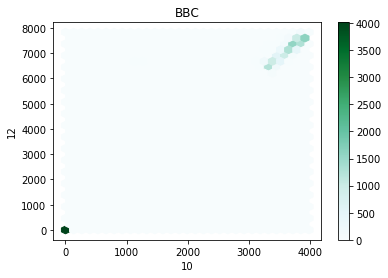

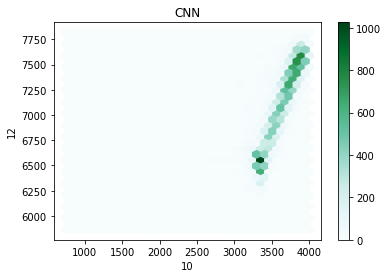

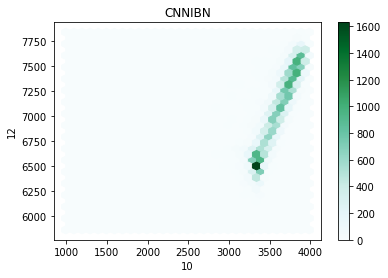

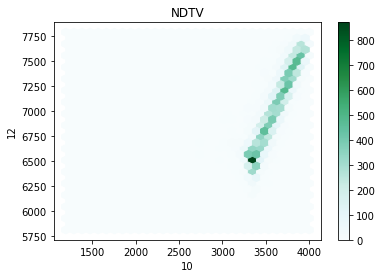

In [25]:
%matplotlib inline

df_plot_bbc.plot(10, 12, kind = 'hexbin', gridsize = 30, sharex = False, title = 'BBC')
df_plot_cnn.plot(10, 12, kind = 'hexbin', gridsize = 30, sharex = False, title = 'CNN')
df_plot_cnnibn.plot(10, 12, kind = 'hexbin', gridsize = 30, sharex = False, title = 'CNNIBN')
df_plot_ndtv.plot(10, 12, kind = 'hexbin', gridsize = 30, sharex = False, title = 'NDTV')